In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# run once only
print(os.getcwd())
#  moving into the drive directory for the pictures
dir = "gdrive/MyDrive/254pic/Pic"
os.chdir(dir)
print(os.getcwd())

/content
/content/gdrive/MyDrive/254pic/Pic


In [ ]:
# pip installs and imports
!pip install matplotlib
!pip install opencv-python
!pip install glob2
!pip install tensorflow

import glob
import matplotlib as mpl
import cv2
import PIL
import random
import numpy as np
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# list of fruit names
fruit_names = []

# 2D list of fruit names and pictures
fruit_pics = []

# gather folders in the directory to add to fruit names
for folder in os.listdir():
  # appending the names
  fruit_names.append(folder)
  # for each fruit type we append a list
  fruit_pics.append([])

img_size = 32

# loading fruit images from drive
print("Names:", fruit_names)
fruit_index = 0
fruit_label_dict = {}
counter = 0
for fruit_folder in fruit_names:
  print(fruit_folder, end = ' ')
  fruit_label_dict[fruit_folder] = fruit_index
  for filename in glob.glob("./" + fruit_folder + "/" + "*.jpg"):
    if counter % 100 == 0:
      print(fruit_folder, counter)
    counter += 1
    # reads the image and saves it
    img = cv2.imread(filename)
    # converting to rgb colorspace
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # make image smaller to guarentee images will be same size
    img = cv2.resize(img, (img_size, img_size))
    if img is not None:
      fruit_pics[fruit_index].append(img)

  # reading in pngs
  for filename in glob.glob("./" + fruit_folder + "/" + "*.png"):
    if counter % 100 == 0:
      print(fruit_folder, counter)
    counter += 1
    img = cv2.imread(filename)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    if img is not None:
      fruit_pics[fruit_index].append(img)
  fruit_index += 1

print(fruit_label_dict)


Names: ['Pineapple', 'Avocado', 'Blueberry', 'Kiwi', 'Lemon', 'Limes', 'Peach', 'Orange', 'Strawberry', 'Watermelon', 'Apple_Fresh', 'Banana_Fresh', 'Banana_Stale', 'Apple_Stale']
Pineapple Pineapple 0
Pineapple 100
Pineapple 200
Pineapple 300
Pineapple 400
Pineapple 500
Pineapple 600
Pineapple 700
Pineapple 800
Pineapple 900
Pineapple 1000
Avocado Avocado 1100
Avocado 1200
Avocado 1300
Avocado 1400
Avocado 1500
Avocado 1600
Avocado 1700
Avocado 1800
Avocado 1900
Avocado 2000
Avocado 2100
Blueberry Blueberry 2200
Blueberry 2300
Blueberry 2400
Blueberry 2500
Blueberry 2600
Blueberry 2700
Blueberry 2800
Blueberry 2900
Blueberry 3000
Blueberry 3100
Blueberry 3200
Blueberry 3300
Kiwi Kiwi 3400
Kiwi 3500
Kiwi 3600
Kiwi 3700
Kiwi 3800
Kiwi 3900
Kiwi 4000
Kiwi 4100
Kiwi 4200
Kiwi 4300
Kiwi 4400
Kiwi 4500
Lemon Lemon 4600
Lemon 4700
Lemon 4800
Lemon 4900
Lemon 5000
Lemon 5100
Lemon 5200
Lemon 5300
Lemon 5400
Lemon 5500
Lemon 5600
Limes Limes 5700
Limes 5800
Limes 5900
Limes 6000
Limes 6100
Lim

In [ ]:

raw_data = []
for i in range(len(fruit_pics)):
  for j in range(len(fruit_pics[i])):
    cur = []
    cur.append(fruit_pics[i][j])
    cur.append(i)
    raw_data.append(np.asarray(cur))

t_data = np.asarray(raw_data)
data = t_data
raw_data = np.asarray(raw_data)

print(data.shape)

(14135, 2)


<ipython-input-8-09eae5588090>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  raw_data.append(np.asarray(cur))


Banana_Fresh


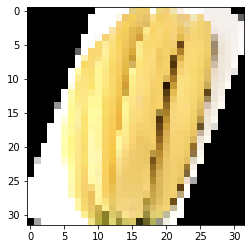

In [ ]:
choice = random.choice(t_data)
mpl.pyplot.imshow(choice[0])
print(fruit_names[choice[1]])

In [ ]:
# function to add noise to images
def noise(num):
  value = np.random.normal(loc=0.0, scale = 20)
  return max(min(num+value, 255), 0)

a = 0
# grabs each image and its label
for img in data:
  a += 1
  if a % 500 == 0:
    print(a, end = " ")
  # we want only the image rgb values
  for img_data in img[0]:
    # for each rgb in the image 
    for rgb in img_data:
      # grab one of the rows and throw it into the noise function
      for i in range(len(rgb)):
        # replace the values with the new ones
        rgb[i] = noise(rgb[i])
      

14135
500 1000 1500 2000 2500 3000 3500 4000 4500 5000 5500 6000 6500 7000 7500 8000 8500 9000 9500 10000 10500 11000 11500 12000 12500 13000 13500 14000 

Strawberry


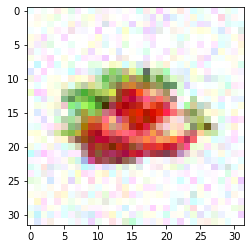

In [ ]:
# check that noise was added
choice = random.choice(data)
mpl.pyplot.imshow(choice[0])
print(fruit_names[choice[1]])

In [ ]:
# Preprocessing the data 
# Split data using 25% split
# Really should consider organizing the data differently into numpy array not lists, and flatten

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
X = data[:, 0]
y = data[:, 1]

model = None

# split data (using 10% split here becuase we have a good amount of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# check split
print("X Training shape:", X_train.shape, " X Testing shape:", X_test.shape, \
      " Y Training shape:", y_train.shape, " Y Testing shape:", y_test.shape)

# Normalize to values between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Make sure data is a multidimensional array so the model recognizes how to interpret data
X_train = np.array([np.array(val) for val in X_train])
X_test = np.array([np.array(val) for val in X_test])
y_train = np.array([np.array(val) for val in y_train])
y_test = np.array([np.array(val) for val in y_test])


# Convolutional neural net
model = tf.keras.Sequential([
    # Add a convolutional layer with 16 filters and a kernel size of 3x3
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    # Add a second convolutional layer with 32 filters and a kernel size of 3x3
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    # Add a max pooling layer with a 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flatten the feature maps to create a 1D input for the dense layers
    tf.keras.layers.Flatten(),
    # Add a dense layer with 128 units and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),
    # Add a final dense layer with the number of classes (fruit_names) units and a softmax activation function
    tf.keras.layers.Dense(len(fruit_names), activation='softmax')])

# check the model 
print(model.summary())

# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

e = 10  # epochs
history = model.fit(X_train, y_train, epochs=e)


X Training shape: (12721,)  X Testing shape: (1414,)  Y Training shape: (12721,)  Y Testing shape: (1414,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


398/398 [==============================] - 26s 64ms/step - loss: 0.8686 - accuracy: 0.7345
Epoch 2/10
398/398 [==============================] - 27s 68ms/step - loss: 0.4429 - accuracy: 0.8554
Epoch 3/10
398/398 [==============================] - 30s 76ms/step - loss: 0.3290 - accuracy: 0.8918
Epoch 4/10
398/398 [==============================] - 25s 63ms/step - loss: 0.2646 - accuracy: 0.9123
Epoch 5/10
398/398 [==============================] - 25s 63ms/step - loss: 0.2229 - accuracy: 0.9268
Epoch 6/10
398/398 [==============================] - 25s 63ms/step - loss: 0.1656 - accuracy: 0.9487
Epoch 7/10
398/398 [==============================] - 25s 63ms/step - loss: 0.1252 - accuracy: 0.9611
Epoch 8/10
398/398 [==============================] - 25s 63ms/step - loss: 0.1103 - accuracy: 0.9659
Epoch 9/10
398/398 [==============================] - 26s 64ms/step - loss: 0.0832 - accuracy: 0.9737
Epoch 10/10
398/398 [==============================] - 25s 63ms/step - loss: 0.0569 - accurac

In [ ]:
# save the trained model
model.save('/content/gdrive/My Drive/254pic/new_trained_model.h5')

In [ ]:
# loads model
model = tf.keras.models.load_model('/content/gdrive/My Drive/254pic/trained_model.h5')

Actual: Strawberry
Prediction: Watermelon
Took 4 attempts before getting an answer wrong


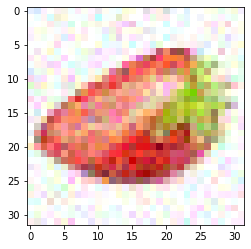

In [ ]:
import random
random_number = None
choice = None
predict = None
got_correct = 0

# check implementation of the trained model
# set to true to see the model getting an answer wrong
until_false = True
if until_false:
  while True:
    random_number = random.randint(0, len(X_test) - 1)
    choice = X_test[random_number]
    choice = np.reshape(choice, (1, img_size, img_size, 3))
    predict = model.predict(choice, verbose = 0)
    if fruit_names[y_test[random_number]] != fruit_names[np.argmax(predict)]:      
      print("Actual:", fruit_names[y_test[random_number]])
      print("Prediction:", fruit_names[np.argmax(predict)])
      mpl.pyplot.imshow(choice[0])
      print("Took", got_correct, "attempts before getting an answer wrong")
      break
    got_correct += 1
    if got_correct >= 1000:
      break
else:
  random_number = random.randint(0, len(X_test))
  choice = X_test[random_number]
  choice = np.reshape(choice, (1, img_size, img_size, 3))
  predict = model.predict(choice)

  print("Actual:", fruit_names[y_test[random_number]])
  print("Prediction:", fruit_names[np.argmax(predict)])
  mpl.pyplot.imshow(choice[0])
  

In [ ]:
# model performance metrics
model.evaluate(X_test, y_test)

45/45 [==============================] - 1s 19ms/step - loss: 0.5094 - accuracy: 0.8932


[0.5093652606010437, 0.893210768699646]

In [ ]:
%load_ext tensorboard

In [ ]:
#%tensorboard --logdir logs/fit

45/45 [==============================] - 1s 18ms/step
(1414,)
[[ 88   4   5   2   1   1   0   1   1   1   0   1   1   0]
 [  1  86   5   6   2   3   0   0   1   2   0   0   4   0]
 [  1   3 101   3   0   1   0   0   1   1   0   0   0   0]
 [  3   3   0 104   4   5   1   0   0   1   0   0   0   0]
 [  1   2   1   0  96   5   0   3   0   2   0   0   0   0]
 [  2   4   3   1   2  84   0   1   0   8   0   1   0   0]
 [  0   0   0   0   0   0  89   0   0   0   0   0   0   0]
 [  2   1   1   4   2   2   2 110   0   0   0   0   0   0]
 [  2   2   0   1   0   0   0   0 119   4   0   0   1   0]
 [  1   1   2   0   0   3   0   0   3 104   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  97   0   0   0]
 [  3   0   0   0   0   1   0   0   0   0   0  54   1   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0  70   1]
 [  0   0   0   0   0   0   2   0   2   0   0   0   1  61]]


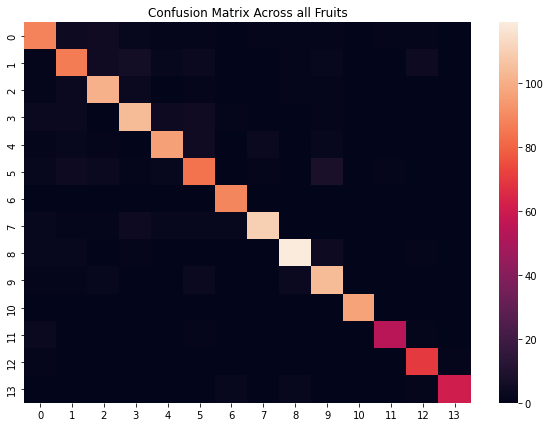

In [ ]:
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt

# Use the model to predict the values from the validation dataset.
pred = model.predict(X_test)
test_pred = np.argmax(pred, axis=1)
print(y_test.shape)

# Calculate the confusion matrix.
cm = sklearn.metrics.confusion_matrix(y_test, test_pred)
print(cm)
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix Across all Fruits")
sn.heatmap(cm)

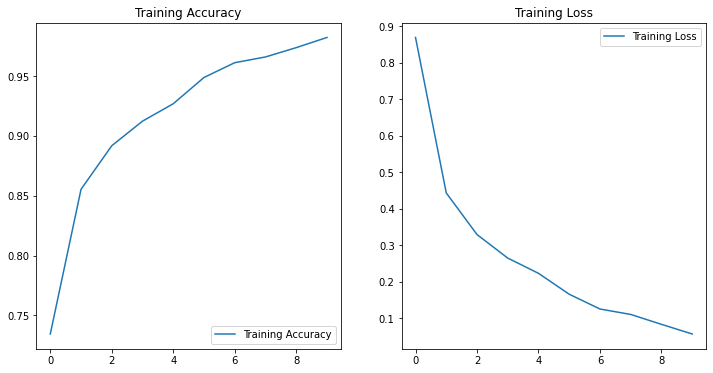

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(e)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

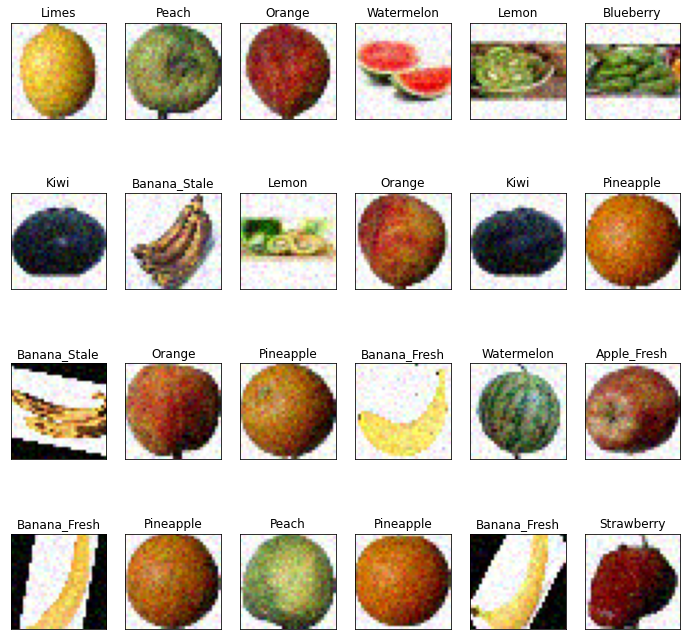

In [ ]:
import matplotlib.pyplot as plt
import random as rand
# Visualize fruits with noise
class_names = ['Avocado', 'Blueberry', 'Kiwi', 'Lemon', 'Limes', 'Peach', 'Orange', 'Pineapple', 'Strawberry', 'Watermelon', 'Apple_Fresh', 'Banana_Fresh', 'Banana_Stale', 'Apple_Stale']
figure = plt.figure(figsize=(12,12))
for i in range(24):
  # Start next subplot.
  num = rand.randint(0, len(X_train))
  plt.subplot(4, 6, i+1, title=class_names[y_train[num]])
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[num], cmap=plt.cm.binary)

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print('\nTrain accuracy:', train_acc, '\n')
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

398/398 - 6s - loss: 0.0267 - accuracy: 0.9935 - 6s/epoch - 15ms/step

Train accuracy: 0.9934753775596619 

45/45 - 1s - loss: 0.5094 - accuracy: 0.8932 - 677ms/epoch - 15ms/step

Test accuracy: 0.893210768699646


8


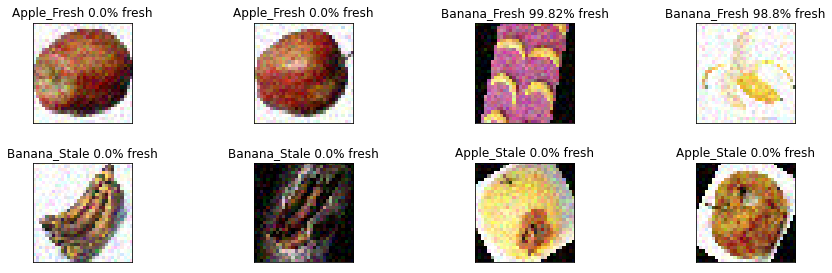

In [ ]:
fruitz = {'Apple_Fresh': 10,'Banana_Fresh': 11, 'Banana_Stale': 12, 'Apple_Stale': 13}
fresh_percents = []
choices = []
choice_types = []
# test each fresh/stale
for fruit in fruitz:
  # doing 2 of each
  for i in range(2):
    # continues until it gets the specified fruit
    num = 0
    choice = ""
    choice_type = ""
    while True:
      num = rand.randint(0, len(X_train) - 1)
      # print(y_train[num])
      if y_train[num] == fruitz[fruit]:
        choice_type = y_train[num]
        break
    choice = X_train[num]
    choice = np.reshape(choice, (1, img_size, img_size, 3))
    softmax_output = model(choice)
    # print(softmax_output)
    fruit_output = []
    if choice_type == "Apple_Stale" or choice_type == "Apple_Fresh":
      # Check both fresh and stale apples
      fruit_output.append(softmax_output[0][10])  # Fresh apple
      fruit_output.append(softmax_output[0][13])  # Stale apple
    else:
      # Check both fresh and stale bananas
      fruit_output.append(softmax_output[0][11])  # Fresh banana
      fruit_output.append(softmax_output[0][12])  # Stale banana
    fresh_percent = round(float(fruit_output[0]), 4)*100
    # print(fruit, "is", fresh_percent, "% fresh")
    fresh_percents.append(fresh_percent)
    choices.append(choice)
    choice_types.append(choice_type)

print(len(choices))
for i in range(len(choices)):
  # Start next subplot.
  n = choice_types[i]
  plt.subplot(len(choices)//2, len(choices)//2, i+1, title= (list(fruitz.keys())[list(fruitz.values()).index(n)]) + " " + str(round(fresh_percents[i], 4)) + "% fresh")
  plt.xticks([])
  plt.yticks([])
  plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 2.0, top = 1.9, wspace = 0.4, hspace = 0.4)
  plt.imshow(choices[i][0], cmap=plt.cm.binary)


Actual: Blueberry
Prediction: Pineapple
Took 7 attempts before getting an answer wrong


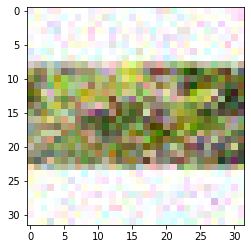

In [ ]:
import random
random_number = None
choice = None
predict = None
got_correct = 0
# set to true to see the model getting an answer wrong
until_false = True
if until_false:
  while True:
    random_number = random.randint(0, len(X_test) - 1)
    choice = X_test[random_number]
    choice = np.reshape(choice, (1, img_size, img_size, 3))
    predict = model.predict(choice, verbose = 0)
    if fruit_names[y_test[random_number]] != fruit_names[np.argmax(predict)]:      
      print("Actual:", fruit_names[y_test[random_number]])
      print("Prediction:", fruit_names[np.argmax(predict)])
      mpl.pyplot.imshow(choice[0])
      print("Took", got_correct, "attempts before getting an answer wrong")
      break
    got_correct += 1
    if got_correct >= 1000:
      break
else:
  random_number = random.randint(0, len(X_test))
  choice = X_test[random_number]
  choice = np.reshape(choice, (1, img_size, img_size, 3))
  predict = model.predict(choice)

  print("Actual:", fruit_names[y_test[random_number]])
  print("Prediction:", fruit_names[np.argmax(predict)])
  mpl.pyplot.imshow(choice[0])